In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
import sys

sys.path.append("../src")

In [3]:
import data_handling as dh
import subsampling as ss
from core import SITE_NAMES, FREQ_GROUPS

from cli import get_file_paths
import plotting
import pipeline

In [4]:
type_key = ''
site_key = "Foliage"
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

In [5]:
pipeline_params = dict()
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = False
pipeline_params["show_PST"] = True
pipeline_params

{'read_csv': False,
 'save_activity_grid': True,
 'save_presence_grid': True,
 'save_dc_night_comparisons': True,
 'save_activity_dc_comparisons': True,
 'save_presence_dc_comparisons': True,
 'show_plots': False,
 'show_PST': True}

In [6]:
data_params = dict()
data_params["site_name"] = SITE_NAMES[site_key]
data_params["site_tag"] = site_key
data_params["type_tag"] = type_key
data_params["freq_tags"] = FREQ_GROUPS[type_key]
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution'] = '30T'
data_params

{'site_name': 'Foliage',
 'site_tag': 'Foliage',
 'type_tag': '',
 'freq_tags': [0, 125000],
 'cycle_lengths': [1800, 360],
 'percent_ons': [0.1667],
 'dc_tags': ['1800of1800', '300of1800', '60of360'],
 'cur_dc_tag': '1800of1800',
 'resolution': '30T'}

In [7]:
file_paths = get_file_paths(data_params)

In [8]:
# dc_tag = data_params["cur_dc_tag"]
# location_df = pd.read_csv(f'{file_paths["SITE_folder"]}/{file_paths["bd2_TYPE_SITE_YEAR"]}.csv', index_col=0)
# # plottable_location_df = ss.simulate_dutycycle_on_detections(location_df, dc_tag)
# cycle_length = int(dc_tag.split('of')[1])
# percent_on = float(dc_tag.split('of')[0]) / cycle_length
# location_df['ref_time']

In [9]:
activity_arr = pipeline.run(data_params, pipeline_params, file_paths)

In [10]:
dh.construct_activity_grid(activity_arr, "1800of1800")

Date (UTC)  07/26/22  07/27/22  07/28/22  07/29/22  07/30/22  07/31/22  \
Time (UTC)                                                               
03:00            0.0       0.0       0.0       1.0       0.0       0.0   
03:30            0.0       0.0       4.0       0.0       0.0       3.0   
04:00            1.0       1.0       0.0       1.0       1.0       8.0   
04:30          112.0     225.0      32.0     311.0     161.0      60.0   
05:00           74.0      11.0      12.0     120.0      37.0       7.0   
05:30           99.0      10.0      25.0      34.0      90.0       8.0   
06:00          117.0      17.0      55.0      20.0      20.0      25.0   
06:30          108.0      18.0      40.0      16.0      33.0      22.0   
07:00            2.0      86.0      77.0      15.0      53.0      36.0   
07:30           43.0      82.0      75.0       5.0      39.0       1.0   
08:00           10.0       9.0      23.0       2.0      36.0      41.0   
08:30           33.0      23.0      69.0      45.0      96.0      33.0   
09:00           27.0      39.0      12.0      13.0      15.0      13.0   
09:30           29.0      66.0     176.0       8.0      23.0      49.0   
10:00           31.0      44.0       6.0      42.0     113.0      10.0   
10:30           98.0       3.0      65.0      57.0      15.0      24.0   
11:00           56.0     219.0       8.0      20.0      16.0       9.0   
11:30           74.0       9.0      46.0      76.0      16.0      29.0   
12:00            1.0       0.0       0.0       0.0       0.0       0.0   
12:30            0.0       0.0       0.0       0.0       0.0       0.0   
13:00            1.0       2.0       0.0       0.0       1.0       0.0   

Date (UTC)  08/01/22  08/02/22  08/03/22  08/04/22  ...  09/17/22  09/18/22  \
Time (UTC)                                          ...                       
03:00            1.0       0.0       0.0       0.0  ...      26.0      11.0   
03:30            0.0       0.0       0.0       0.0  ...      22.0       8.0   
04:00            5.0      18.0      69.0    1880.0  ...      75.0      33.0   
04:30          152.0     297.0     117.0    1907.0  ...      60.0      33.0   
05:00            4.0     727.0      70.0    4016.0  ...     116.0      72.0   
05:30           87.0    1852.0      54.0    2310.0  ...      22.0       6.0   
06:00           17.0    2002.0      45.0    3963.0  ...      47.0       2.0   
06:30            1.0    1519.0      12.0    3498.0  ...       3.0       0.0   
07:00           57.0     533.0      25.0    1657.0  ...       1.0       0.0   
07:30           17.0     924.0      31.0    1794.0  ...      28.0      71.0   
08:00           26.0     486.0      33.0    2851.0  ...       4.0      29.0   
08:30            9.0     665.0      65.0    1152.0  ...      33.0       0.0   
09:00           41.0    1063.0     134.0    3446.0  ...       8.0       0.0   
09:30           25.0    1240.0     214.0    2247.0  ...      12.0       4.0   
10:00           66.0    1483.0     814.0    6886.0  ...      15.0      73.0   
10:30          252.0    2181.0    2929.0    4298.0  ...      26.0     215.0   
11:00          400.0    2712.0    2441.0    5273.0  ...       4.0      27.0   
11:30           47.0    2243.0      72.0    4141.0  ...       1.0     262.0   
12:00           33.0      73.0       0.0     559.0  ...      62.0       0.0   
12:30            0.0       1.0       0.0       0.0  ...       3.0      15.0   
13:00            1.0       0.0       0.0       0.0  ...       2.0       0.0   

Date (UTC)  09/19/22  09/20/22  09/21/22  09/22/22  09/23/22  09/24/22  \
Time (UTC)                                                               
03:00           35.0      24.0      22.0      29.0     683.0      12.0   
03:30          103.0      25.0       0.0       0.0     438.0       4.0   
04:00           22.0      42.0      30.0      21.0     427.0       3.0   
04:30           19.0      15.0       7.0       5.0     265.0      44.0   
05:00           30.0       8.0     

In [11]:
activity_arr[-21:]

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-09-26 03:00:00                                3.0   
2022-09-26 03:30:00                               15.0   
2022-09-26 04:00:00                               33.0   
2022-09-26 04:30:00                                0.0   
2022-09-26 05:00:00                               11.0   
2022-09-26 05:30:00                                1.0   
2022-09-26 06:00:00                               50.0   
2022-09-26 06:30:00                                0.0   
2022-09-26 07:00:00                                0.0   
2022-09-26 07:30:00                                0.0   
2022-09-26 08:00:00                                0.0   
2022-09-26 08:30:00                                1.0   
2022-09-26 09:00:00                               16.0   
2022-09-26 09:30:00                                2.0   
2022-09-26 10:00:00                                0.0   
2022-09-26 10:30:00                               18.0   
2022-09-26 11:00:00                                0.0   
2022-09-26 11:30:00                                0.0   
2022-09-26 12:00:00                                0.0   
2022-09-26 12:30:00                                0.0   
2022-09-26 13:00:00                               22.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-09-26 03:00:00                               2.0   
2022-09-26 03:30:00                               0.0   
2022-09-26 04:00:00                              33.0   
2022-09-26 04:30:00                               0.0   
2022-09-26 05:00:00                               0.0   
2022-09-26 05:30:00                               0.0   
2022-09-26 06:00:00                               0.0   
2022-09-26 06:30:00                               0.0   
2022-09-26 07:00:00                               0.0   
2022-09-26 07:30:00                               0.0   
2022-09-26 08:00:00                               0.0   
2022-09-26 08:30:00                               1.0   
2022-09-26 09:00:00                              15.0   
2022-09-26 09:30:00                               0.0   
2022-09-26 10:00:00                               0.0   
2022-09-26 10:30:00                               0.0   
2022-09-26 11:00:00                               0.0   
2022-09-26 11:30:00                               0.0   
2022-09-26 12:00:00                               0.0   
2022-09-26 12:30:00                               0.0   
2022-09-26 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-09-26 03:00:00                             0.0  
2022-09-26 03:30:00                             0.0  
2022-09-26 04:00:00                             0.0  
2022-09-26 04:30:00                             0.0  
2022-09-26 05:00:00                            11.0  
2022-09-26 05:30:00                             0.0  
2022-09-26 06:00:00                             1.0  
2022-09-26 06:30:00                             0.0  
2022-09-26 07:00:00                             0.0  
2022-09-26 07:30:00                             0.0  
2022-09-26 08:00:00                             0.0  
2022-09-26 08:30:00                             0.0  
2022-09-26 09:00:00                            15.0  
2022-09-26 09:30:00                             0.0  
2022-09-26 10:00:00                             0.0  
2022-09-26 10:30:00                             0.0  
2022-09-26 11:00:00                             0.0  
2022-09-26 11:30:00                             0.0  
2022-09-26 12:00:00                             0.0  
2022-09-26 12:30:00                             0.0  
2022-09-26 13:00:00                            22.0

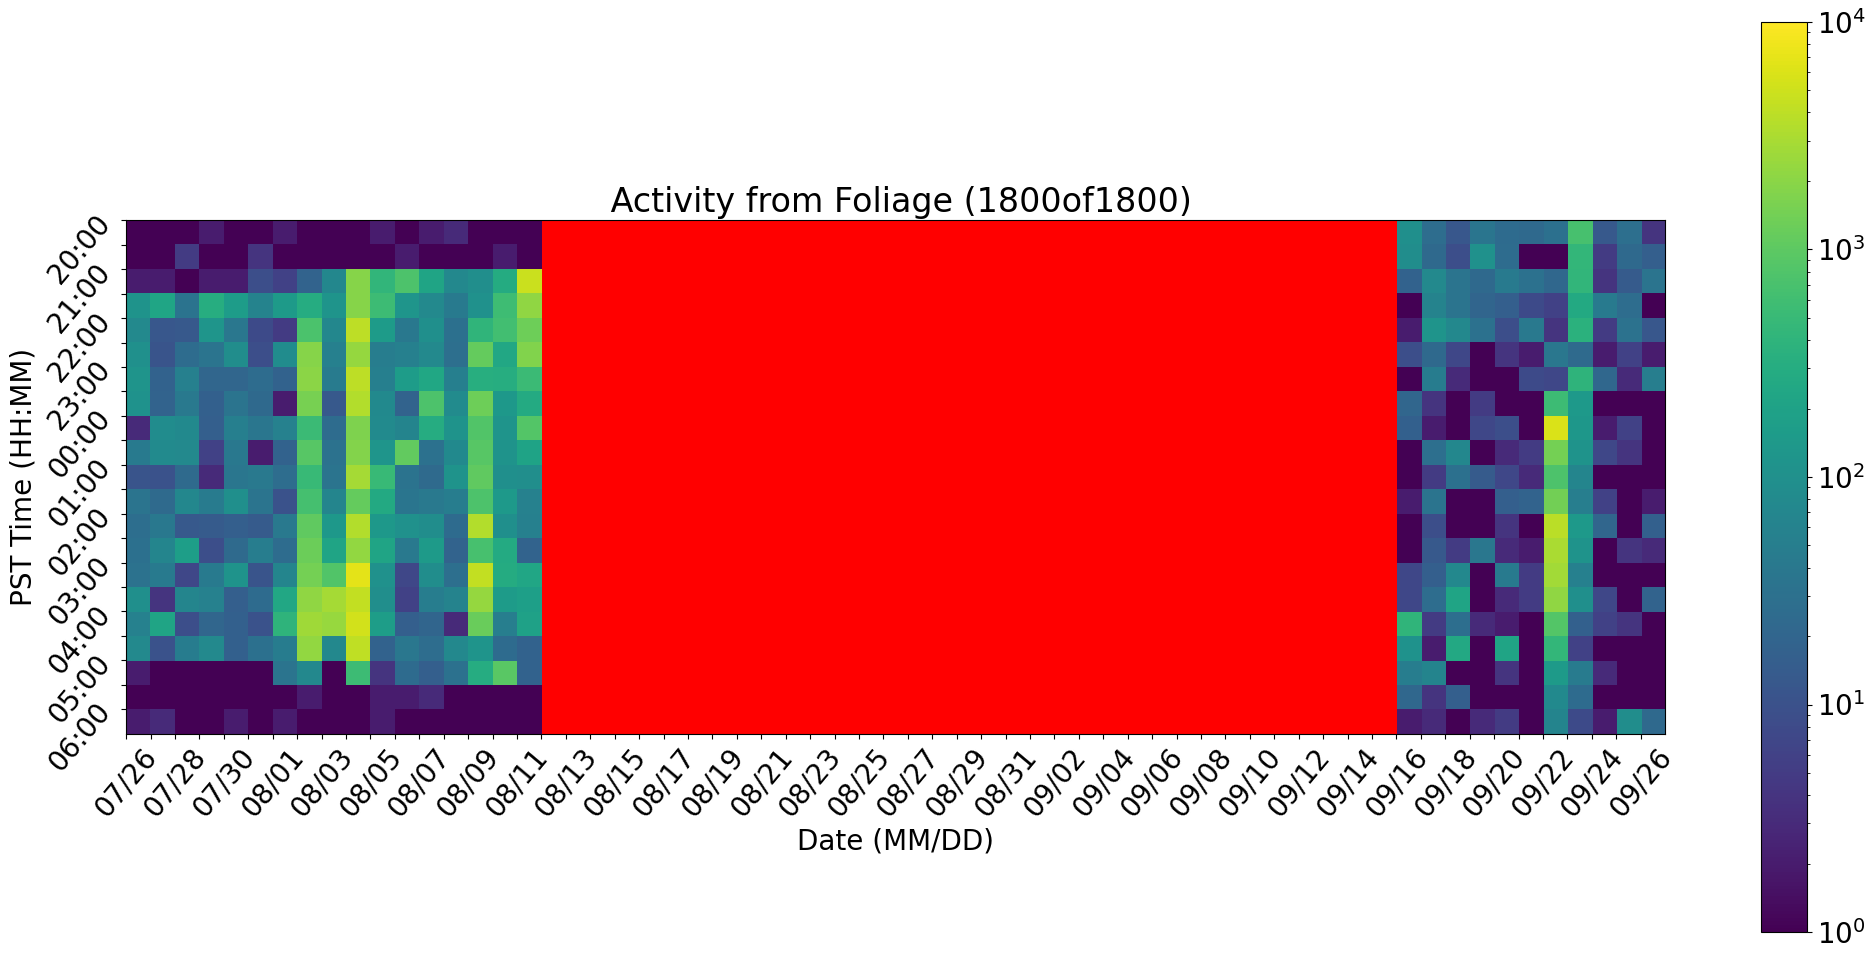

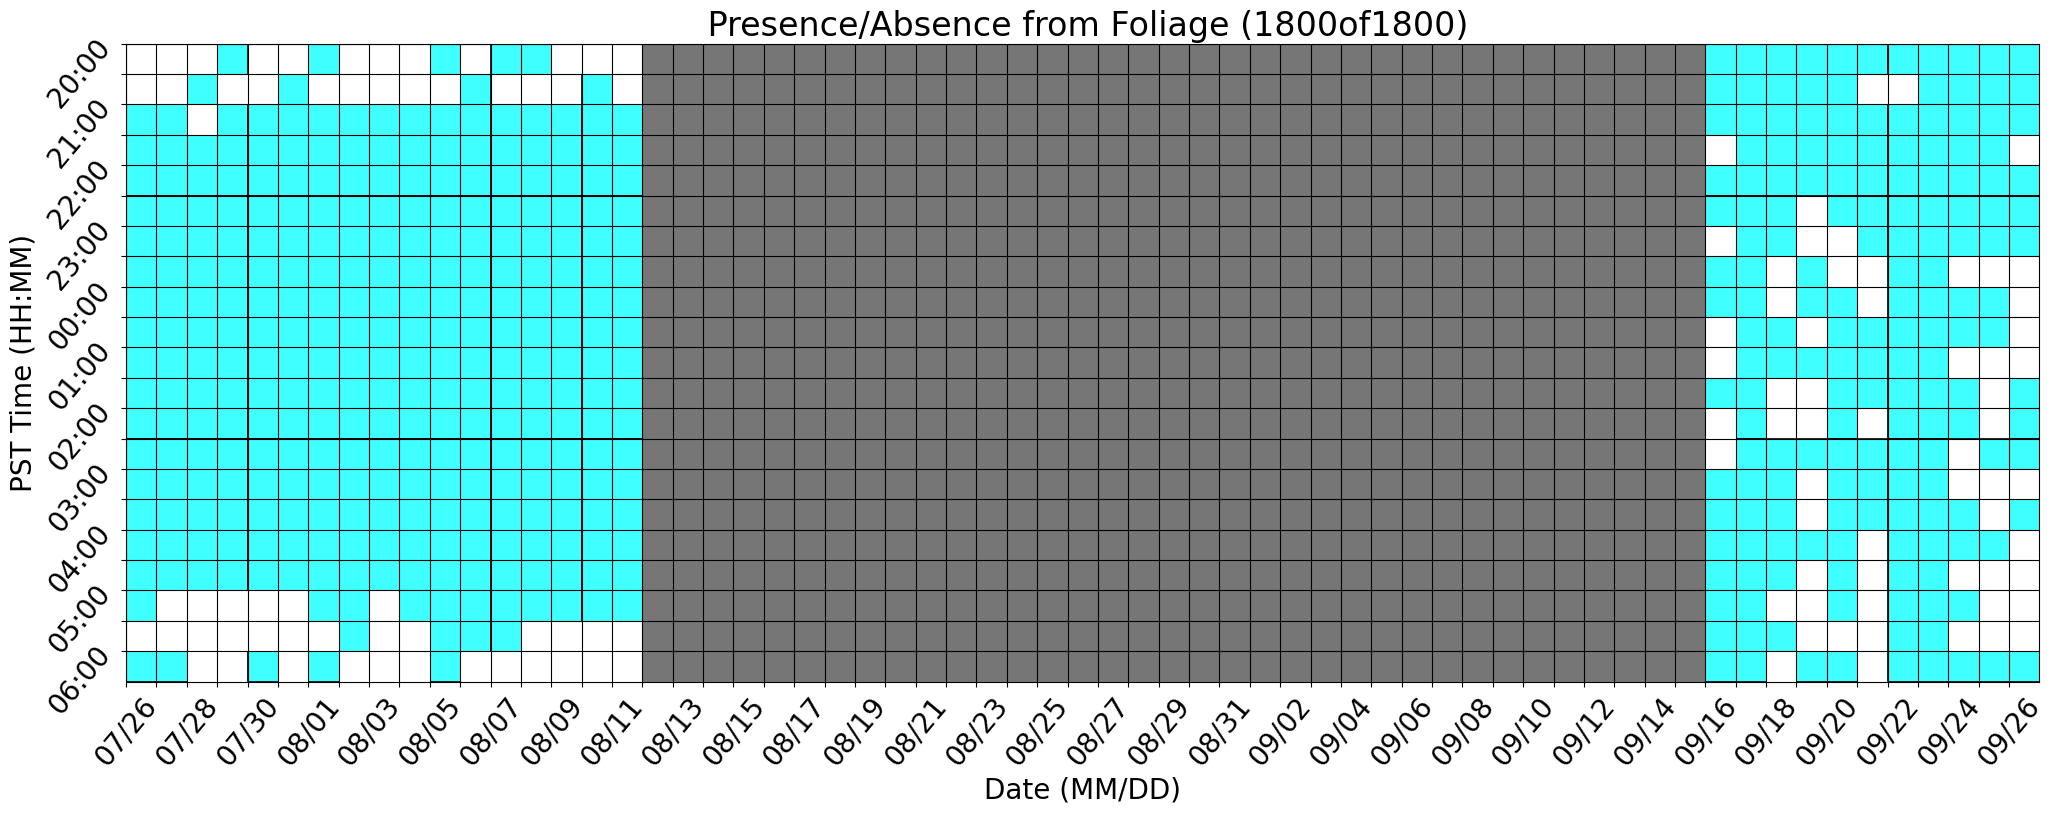

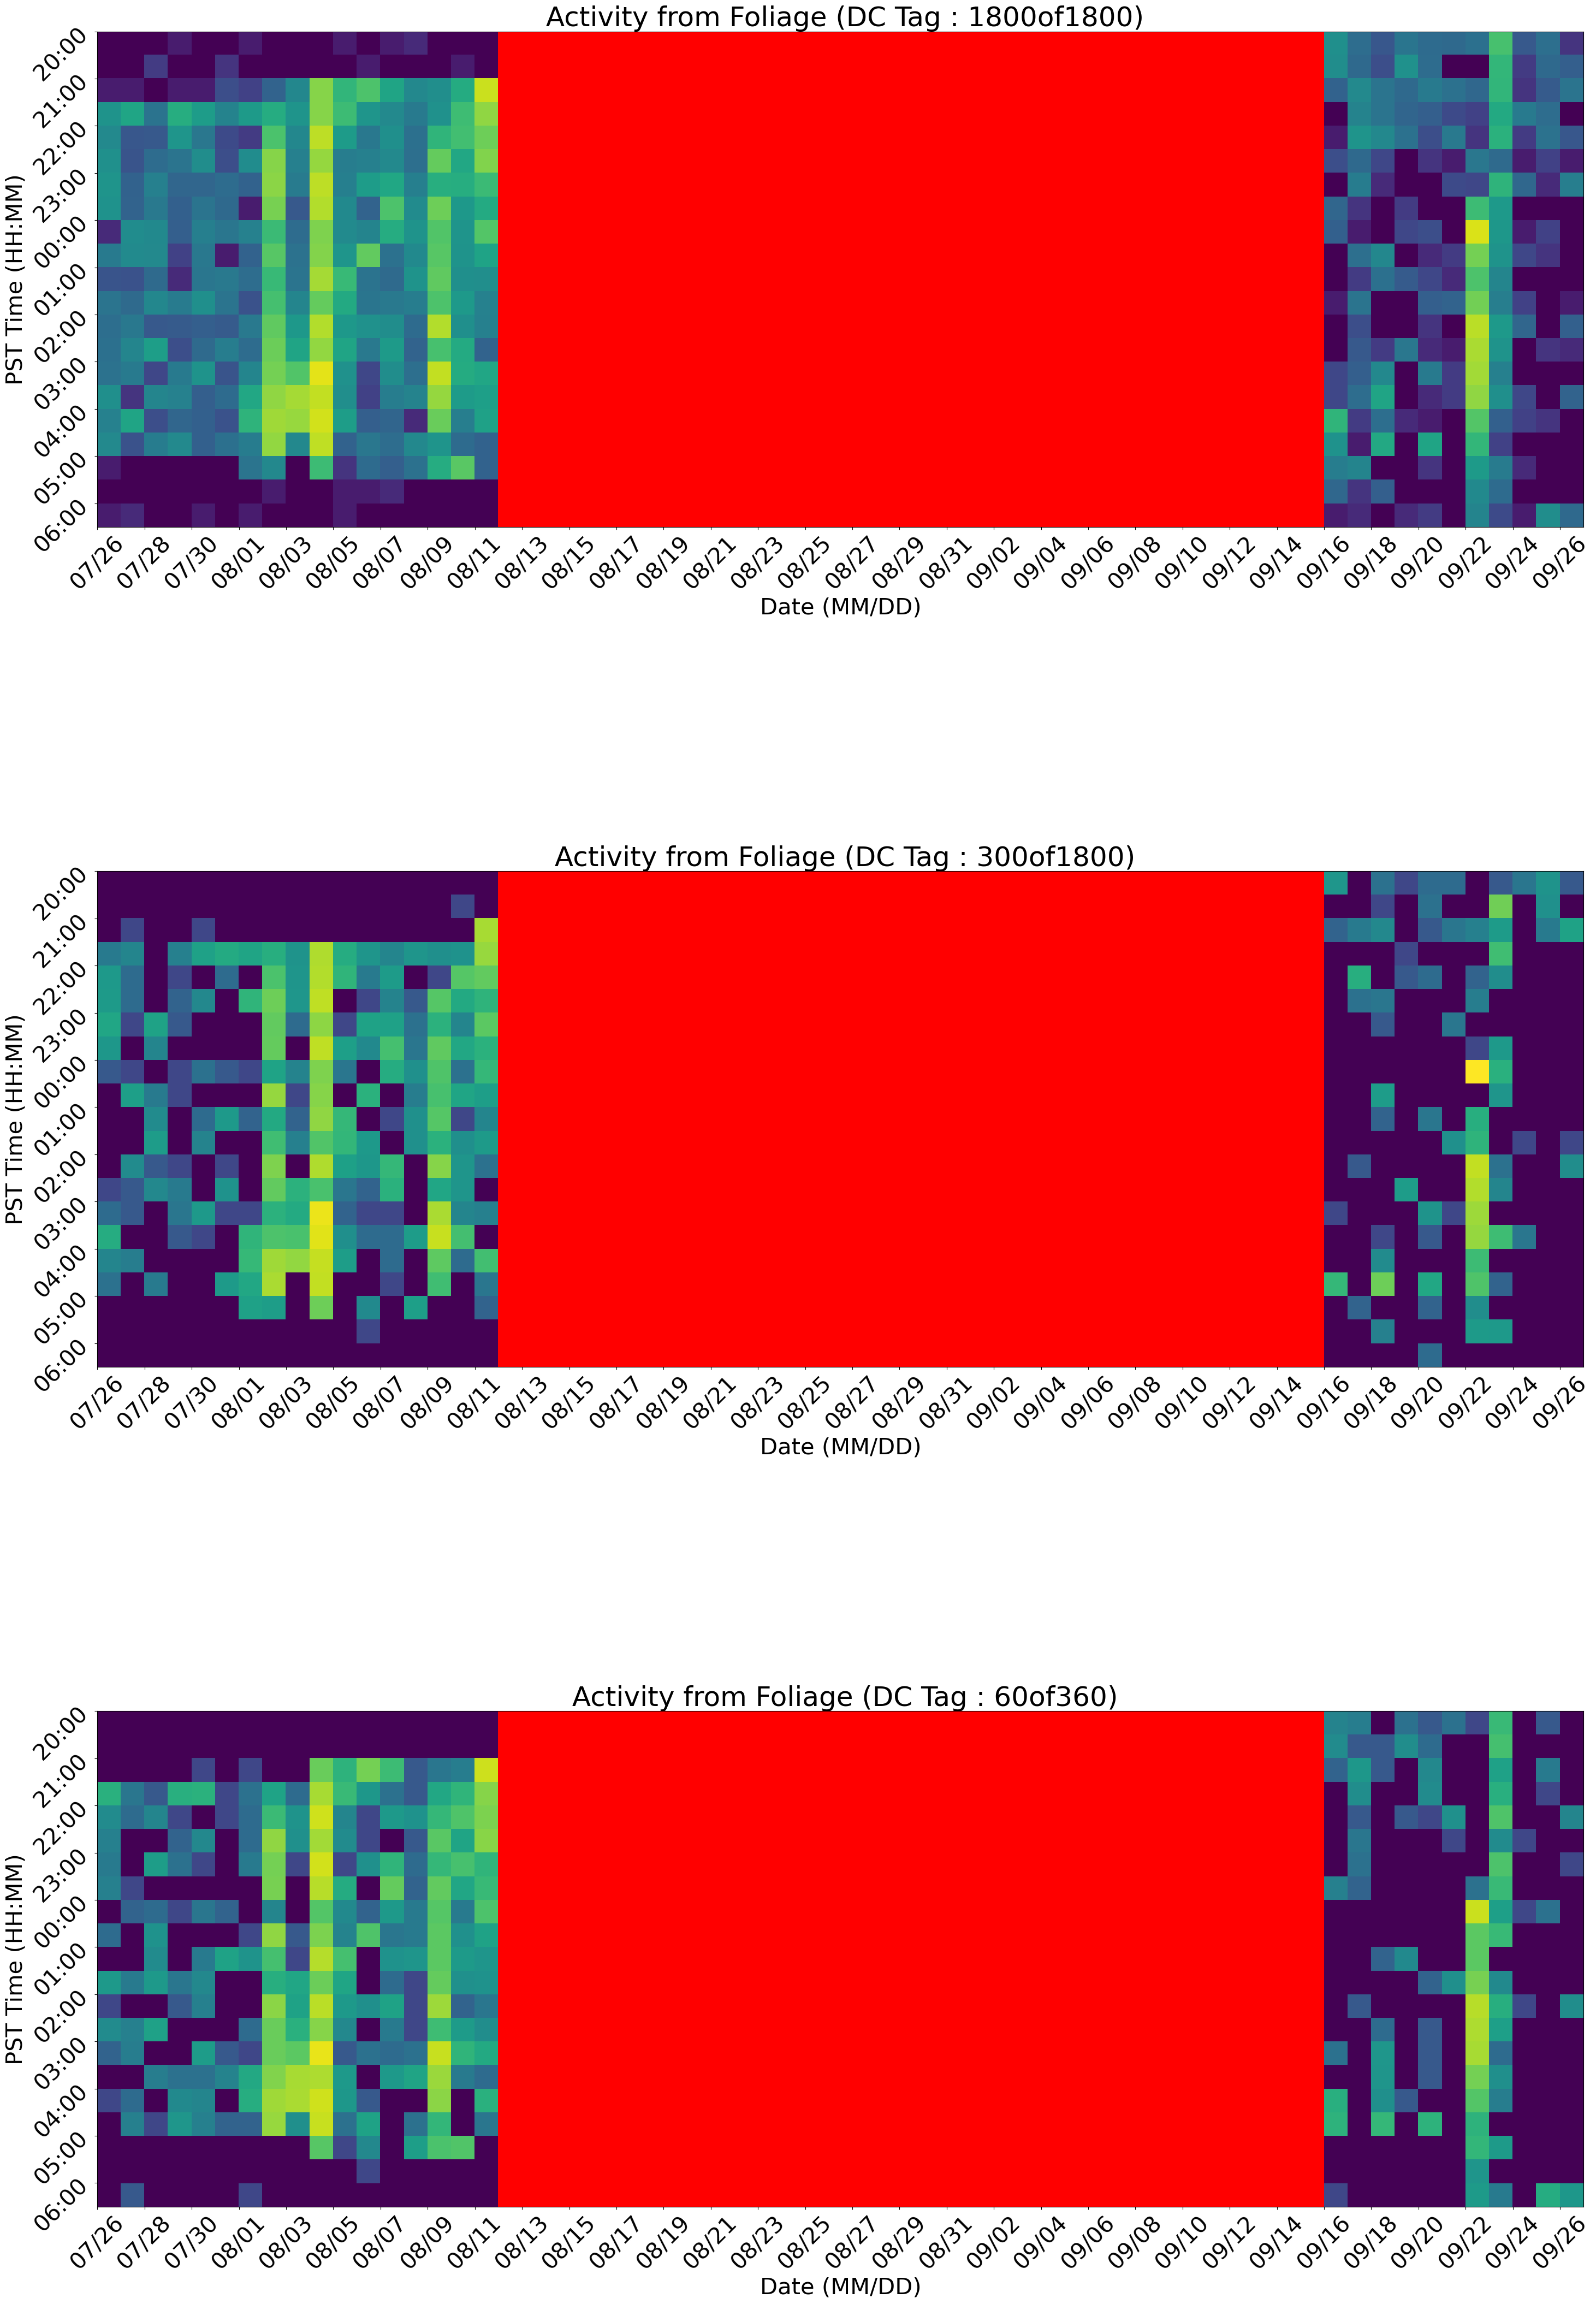

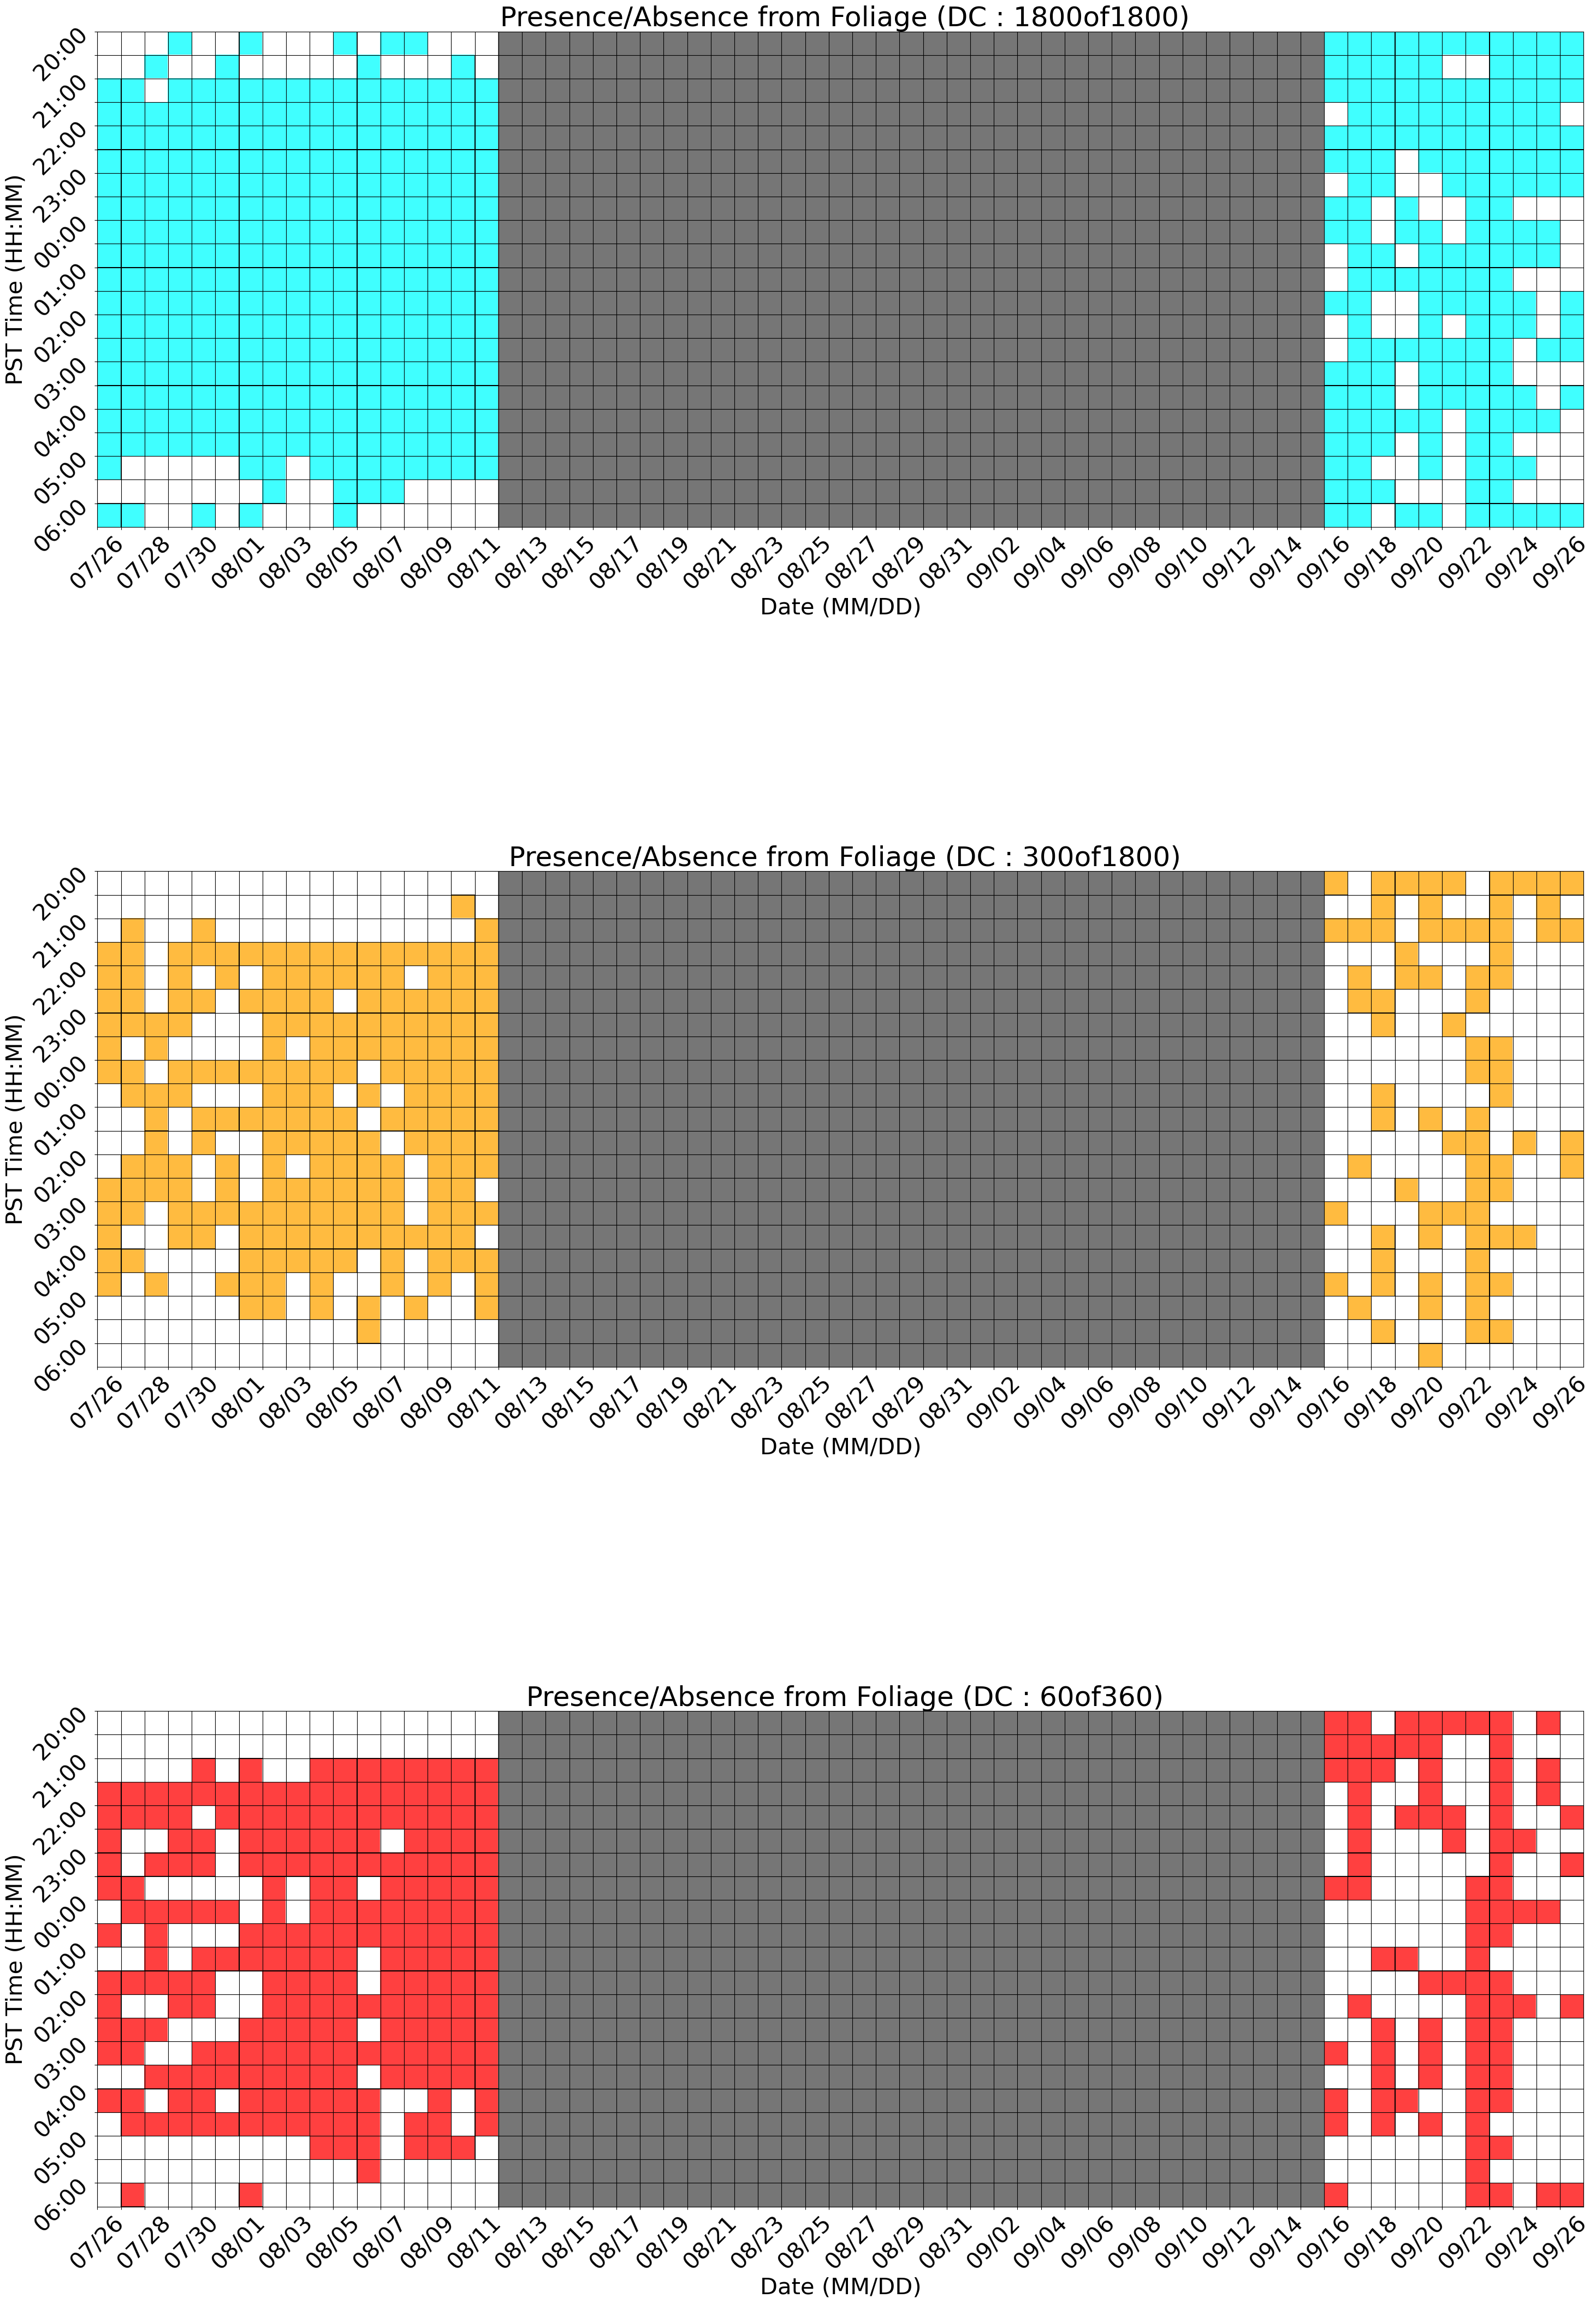

In [12]:
pipeline.plot(activity_arr, data_params, pipeline_params, file_paths)